# Geog 490
## Assignment 3
### Maxim Altan-Lu Shapovalov
#### Jan 21, 2023

## Task 1

In [1]:
# Import stuff
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import osmnx as ox
import networkx as nx

graph = ox.load_graphml('/Users/user/OneDrive - University Of Oregon/UO/TA/490/asgt3/graph.graphml')

In [2]:
# a) 
# Convert the graph to two GeoDataFrames, one containing edges and one containing the nodes.
nodes1 = ox.graph_to_gdfs(graph, nodes=True, edges=False)
edges1 = ox.graph_to_gdfs(graph, nodes=False, edges=True)

# How many nodes and edges does this graph have?
print("nodes:",nodes1.shape[0] ,"   edges:",edges1.shape[0])

nodes: 19793    edges: 42508


In [3]:
# a) alt
nx.info(graph)

/var/folders/lf/xl3n3jq557q8cgbxb_shw6x00000gn/T/ipykernel_46349/264455952.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(graph)


'MultiDiGraph with 19793 nodes and 42508 edges'

In [4]:
# b) What is the coordinate reference system of the nodes GeoDataFrame?
checkk = nodes1.crs
checkk

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# c) List the column names in the edges GeoDataFrame.
edges1.columns

Index(['name', 'length', 'geometry'], dtype='object')

In [6]:
# d) What is the min, max, and mean edge length?

min_edge  = edges1['length'].min()
max_edge  = edges1['length'].max()
mean_edge = edges1['length'].mean()
print("min:",min_edge,"  max:",max_edge,"  mean:",mean_edge)

min: 1.370217966253487   max: 21730.128883116628   mean: 674.3728080973483


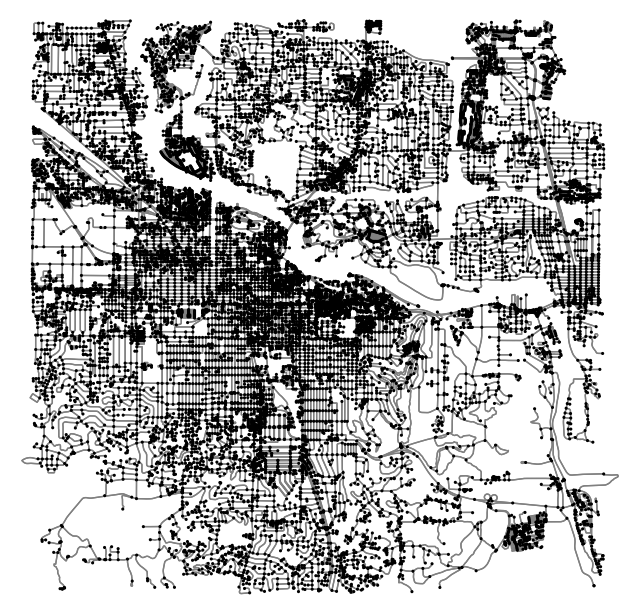

In [7]:
# e) Produce and customize a plot showing the Oregon Highway Network.

# Define coordinates of Condon Hall
lat_lon = (44.0451, -123.0781)

# Define walkable street network 3.2 km around Condon Hall
g = ox.graph_from_point(lat_lon, dist=5000, network_type='walk')

fig, ax = ox.plot_graph(g,bgcolor='white', node_color='black', edge_color='grey', node_size=5)

## Task 2

In [8]:
# Read the oregon_cities.shp using GeoPandas.

goroda = gpd.read_file('/Users/user/OneDrive - University Of Oregon/UO/TA/490/asgt3/oregon_cities/oregon_cities.shp')

In [9]:
# a) Reproject the city GeoDataFrame to UTM Zone 10 N.

goroda_reproj = goroda.to_crs('EPSG:32610')

In [10]:
goroda_reproj

,City,lat,lon,geometry
0,Adair Village city,44.67,-123.22,POINT (482561.392 4946316.184)
1,Adams,45.77,-118.56,POINT (845212.127 5078087.252)
2,Adrian,43.74,-117.07,POINT (977541.425 4860113.062)
3,Albany,44.63,-123.10,POINT (492067.910 4941854.290)
4,Aloha,45.49,-122.87,POINT (510158.282 5037393.753)
...,...,...,...,...
372,Wood Village,45.54,-122.42,POINT (545281.434 5043103.988)
373,Woodburn,45.15,-122.86,POINT (511005.313 4999623.251)
374,Yachats,44.31,-124.10,POINT (412268.825 4906893.114)
375,Yamhill,45.34,-123.19,POINT (485113.923 5020738.776)


In [14]:
# b) Choose four cities in Oregon (the more spread out the better!) 
#    and compute the Euclidean distance (in km) between each pair.

# je choisis les villes de Bend, Corvallis, Eugene, et Portland
bend      = goroda_reproj[goroda_reproj['City'] == 'Bend'].reset_index()
corvallis = goroda_reproj[goroda_reproj['City'] == 'Corvallis'].reset_index()
eugene    = goroda_reproj[goroda_reproj['City'] == 'Eugene'].reset_index()
portland  = goroda_reproj[goroda_reproj['City'] == 'Portland'].reset_index()

# alternatively, have all in one GeoDataFrame
villes = goroda_reproj[goroda_reproj['City'].isin(['Bend','Corvallis','Eugene','Portland'])].copy()

# compute distances
# first, convert GeoDataFrames to shapely Point objects.
from shapely.geometry import Point
point1 = Point(bend['geometry'].x, bend['geometry'].y)
point2 = Point(corvallis['geometry'].x, corvallis['geometry'].y)
point3 = Point(eugene['geometry'].x, eugene['geometry'].y)
point4 = Point(portland['geometry'].x, portland['geometry'].y)
# second, do some math
villes['dist_from_bend']      = villes.distance(point1) / 1000
villes['dist_from_corvallis'] = villes.distance(point2) / 1000
villes['dist_from_eugene']    = villes.distance(point3) / 1000
villes['dist_from_portland']  = villes.distance(point4) / 1000
# let's see it...
villes

,City,lat,lon,geometry,dist_from_bend,dist_from_corvallis,dist_from_eugene,dist_from_portland
28,Bend,44.06,-121.31,POINT (635358.304 4879925.377),0.000000,167.011180,144.976079,195.613181
68,Corvallis,44.57,-123.28,POINT (477767.278 4935222.781),167.011180,0.000000,58.067148,118.625005
100,Eugene,44.06,-123.12,POINT (490388.807 4878543.943),144.976079,58.067148,0.000000,168.552866
262,Portland,45.54,-122.65,POINT (527325.009 5042999.972),195.613181,118.625005,168.552866,0.000000


## This is where i am having trouble (below)

In [ ]:
# c) List the nearest node for each of the four cities.
# some preliminary work first

# get x y coordinates
eug  = [eugene['geometry'].x.values[0],eugene['geometry'].y.values[0]]
corv = [corvallis['geometry'].x.values[0],corvallis['geometry'].y.values[0]]
bnd  = [bend['geometry'].x.values[0],bend['geometry'].y.values[0]]
port = [portland['geometry'].x.values[0],portland['geometry'].y.values[0]]



In [ ]:
# Convert to graph
graph_proj = ox.project_graph(g, to_crs=None)

# Find the node in the graph that is closest to the origin point
eug_node  = ox.distance.nearest_nodes(graph_proj, X=eug[0], Y=eug[1], return_dist=False)
corv_node = ox.distance.nearest_nodes(graph_proj, X=corv[0], Y=corv[1], return_dist=False)
bnd_node  = ox.distance.nearest_nodes(graph_proj, X=bnd[0], Y=bnd[1], return_dist=False)
port_node = ox.distance.nearest_nodes(graph_proj, X=port[0], Y=port[1], return_dist=False)



In [ ]:
# Calculate the shortest path
route  = nx.shortest_path(G=graph_proj, source=eug_node, target=corv_node, weight='length')
length = nx.shortest_path_length(G=graph_proj, source=eug_node, target=corv_node, weight='length')

In [ ]:
print("Shortest path distance = {t:.1f} km.".format(t=length/1000))

In [ ]:
# Plot the shortest path using folium
m= ox.plot_route_folium(g, route, weight=5)
m